# Scientific Programming

**Pandas, xarray, and the scientific python ecosystem**

**[Fabien Maussion](http://fabienmaussion.info)**

<img align="left" width="30%" src="https://www.uibk.ac.at/public-relations/grafik_design/images/logo/download/sublogos/institute-sublogos/atmospheric-and-cryospheric-sciences.png"/>

## How to use these slides

- ``<space>`` : go to the next slide
- ``<shift+space>``: go back
- ``<left right up down arrows>``: navigate through the presentation structure
- ``<esc>``: toggle overview mode

<a href="https://creativecommons.org/licenses/by/4.0/" target="_blank">
  <img align="left" src="https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by.svg"/>
</a>

<br>
<br>
        
These lecture notes and exercises are licensed under a [Creative Commons Attribution 4.0 International License (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)

# Organizational

# Exam

**What?** Will be an **oral exam**: 30 min preparation, 30 min questions.

**When?** first week or last week of February.
Choose your examination time slot on our google sheet (first come, first serve).

## How will the exam look like? 

- we meet in my office
- topic + list of questions assigned randomly at arrival 
- 30 minutes preparation: I will provide a computer (linux with internet)
- 30 minutes questions

## What will be tested for?

- ability to read and understand code from freely available scientific software
- ability to explain a code structure / algorithm
- knowledge of the core concepts and semantics learned during the lecture 
- ability to solve a programming problem and plan a programming task

If you worked regularly during the semester and learned the **bold** elements in the lecture notes you should be good to go!

## Program for the last weeks

- **Today**: scientific python
- **Next week:** last lecture on open source + project time (+ **would you like to present your climvis work???)**
- **Last week:** pelita tournament (deadline for player submission at 8pm the day before)

# The scientific python stack

  <img align="center" width="90%" src="http://fabienmaussion.info/acinn_python_workshop/figures/scipy_ecosystem.png"/>

## Pandas:  fast, flexible, and expressive data structures 

**Data from** https://data.oecd.org/agroutput/meat-consumption.htm 

In [1]:
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt
%matplotlib inline
 
url = ('https://stats.oecd.org/sdmx-json/data/DP_LIVE/.MEATCONSUMP.../OECD?'
       'contentType=csv&detail=code&separator=comma&csv-lang=en')
s = requests.get(url).content
df = pd.read_csv(io.StringIO(s.decode('utf-8')))

**The power of** [split-apply-combine](https://pandas.pydata.org/pandas-docs/stable/groupby.html)

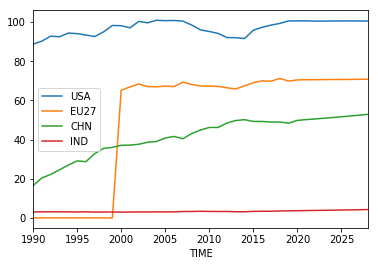

In [2]:
df.loc[(df.LOCATION == 'USA') & (df.MEASURE=='KG_CAP')].groupby('TIME').sum().Value.plot(label='USA');
df.loc[(df.LOCATION == 'EU27') & (df.MEASURE=='KG_CAP')].groupby('TIME').sum().Value.plot(label='EU27');
df.loc[(df.LOCATION == 'CHN') & (df.MEASURE=='KG_CAP')].groupby('TIME').sum().Value.plot(label='CHN');
df.loc[(df.LOCATION == 'IND') & (df.MEASURE=='KG_CAP')].groupby('TIME').sum().Value.plot(label='IND');
plt.legend();

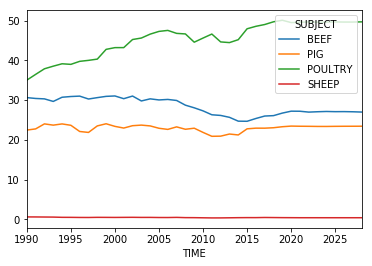

In [3]:
groups = df.loc[(df.LOCATION == 'USA') & (df.MEASURE=='KG_CAP')].groupby(['SUBJECT', 'TIME'])
groups['Value'].sum().unstack(level=0).plot();

## xarray: pandas for N-dimensional data 

## Our data

<img src="./figures/dataset.png" width="50%" align="right"> 

- numeric
- multi-dimensional
- labelled
- (lots of) metadata
- sometimes (very) large

## numpy.array

In [4]:
import numpy as np
a = np.array([[1, 3, 9], [2, 8, 4]])
a

array([[1, 3, 9],
       [2, 8, 4]])

In [5]:
a[1, 2]

4

In [6]:
a.mean(axis=0) 

array([1.5, 5.5, 6.5])

## xarray.DataArray

In [7]:
import xarray as xr
da = xr.DataArray(a, dims=['lat', 'lon'], 
                  coords={'lon':[11, 12, 13], 'lat':[1, 2]})
da

<xarray.DataArray (lat: 2, lon: 3)>
array([[1, 3, 9],
       [2, 8, 4]])
Coordinates:
  * lon      (lon) int64 11 12 13
  * lat      (lat) int64 1 2

In [8]:
da.sel(lon=13, lat=2)

<xarray.DataArray ()>
array(4)
Coordinates:
    lon      int64 13
    lat      int64 2

In [9]:
da.mean(dim='lat')

<xarray.DataArray (lon: 3)>
array([1.5, 5.5, 6.5])
Coordinates:
  * lon      (lon) int64 11 12 13

# Arithmetics

## Broadcasting

<img src="./figures/broadcast.png" width="50%" align="left"> 

In [10]:
a = xr.DataArray(np.arange(3), dims='time', 
                 coords={'time':np.arange(3)})
b = xr.DataArray(np.arange(4), dims='space', 
                 coords={'space':np.arange(4)})
a + b

<xarray.DataArray (time: 3, space: 4)>
array([[0, 1, 2, 3],
       [1, 2, 3, 4],
       [2, 3, 4, 5]])
Coordinates:
  * time     (time) int64 0 1 2
  * space    (space) int64 0 1 2 3

## Alignment 

<img src="./figures/align.png" width="50%" align="left"> 

In [11]:
a = xr.DataArray(np.arange(3), dims='time', 
                 coords={'time':np.arange(3)})
b = xr.DataArray(np.arange(5), dims='time', 
                 coords={'time':np.arange(5)+1})
a + b

<xarray.DataArray (time: 2)>
array([1, 3])
Coordinates:
  * time     (time) int64 1 2

# (Big) data: multiple files

Opening all files in a directory...

In [12]:
mfs = '/home/mowglie/disk/Data/Gridded/GPM/3BDAY_sorted/*.nc'
dsmf = xr.open_mfdataset(mfs, combine='by_coords')

... results in a consolidated dataset ...

In [13]:
dsmf

<xarray.Dataset>
Dimensions:           (lat: 732, lon: 620, time: 672)
Coordinates:
  * lat               (lat) float32 -56.95 -56.85 -56.75 ... 16.05 16.149998
  * lon               (lon) float32 -93.549995 -93.45 ... -31.750004 -31.649998
  * time              (time) datetime64[ns] 2014-03-31 2014-04-01 ... 2016-01-31
Data variables:
    precipitationCal  (time, lat, lon) float64 dask.array<shape=(672, 732, 620), chunksize=(1, 732, 620)>
    precipitationHQ   (time, lat, lon) float64 dask.array<shape=(672, 732, 620), chunksize=(1, 732, 620)>
Attributes:
    HDF5_GLOBAL.BeginDate:       2014-03-31
    HDF5_GLOBAL.BeginTime:       00:00:00.000Z
    HDF5_GLOBAL.EndDate:         2014-03-31
    HDF5_GLOBAL.EndTime:         23:59:59.999Z
    HDF5_GLOBAL.FileHeader:      StartGranuleDateTime=2014-03-31T00:00:00.000...
    HDF5_GLOBAL.InputPointer:    3B-HHR.MS.MRG.3IMERG.20140331-S000000-E00295...
    HDF5_GLOBAL.title:           GPM Level 3 IMERG Final Daily 0.1 x 0.1 degr...
    HDF5_GLOB

... on which all usual operations can be applied:

In [14]:
dsmf = dsmf.sel(time='2015')
dsmf

<xarray.Dataset>
Dimensions:           (lat: 732, lon: 620, time: 365)
Coordinates:
  * lat               (lat) float32 -56.95 -56.85 -56.75 ... 16.05 16.149998
  * lon               (lon) float32 -93.549995 -93.45 ... -31.750004 -31.649998
  * time              (time) datetime64[ns] 2015-01-01 2015-01-02 ... 2015-12-31
Data variables:
    precipitationCal  (time, lat, lon) float64 dask.array<shape=(365, 732, 620), chunksize=(1, 732, 620)>
    precipitationHQ   (time, lat, lon) float64 dask.array<shape=(365, 732, 620), chunksize=(1, 732, 620)>
Attributes:
    HDF5_GLOBAL.BeginDate:       2014-03-31
    HDF5_GLOBAL.BeginTime:       00:00:00.000Z
    HDF5_GLOBAL.EndDate:         2014-03-31
    HDF5_GLOBAL.EndTime:         23:59:59.999Z
    HDF5_GLOBAL.FileHeader:      StartGranuleDateTime=2014-03-31T00:00:00.000...
    HDF5_GLOBAL.InputPointer:    3B-HHR.MS.MRG.3IMERG.20140331-S000000-E00295...
    HDF5_GLOBAL.title:           GPM Level 3 IMERG Final Daily 0.1 x 0.1 degr...
    HDF5_GLOB

Yes, even computations!

In [15]:
ts = dsmf.precipitationCal.mean(dim=['lon', 'lat'])
ts

<xarray.DataArray 'precipitationCal' (time: 365)>
dask.array<shape=(365,), dtype=float64, chunksize=(1,)>
Coordinates:
  * time     (time) datetime64[ns] 2015-01-01 2015-01-02 ... 2015-12-31

Computations are done "lazily"

No actual computation has happened yet:

In [16]:
ts.data

dask.array<mean_agg-aggregate, shape=(365,), dtype=float64, chunksize=(1,)>

But they can be triggered:

In [17]:
ts = ts.load()
ts

<xarray.DataArray 'precipitationCal' (time: 365)>
array([2.297214, 3.00098 , 2.532836, ..., 2.516468, 2.334409, 3.469001])
Coordinates:
  * time     (time) datetime64[ns] 2015-01-01 2015-01-02 ... 2015-12-31

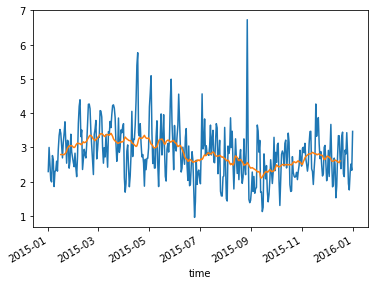

In [18]:
ts.plot();
ts.rolling(time=31, center=True).mean().plot();

**Have fun with Python in your studies and beyond!**

... when will you have to use programming again in your master? I asked your teachers:

- Cryosphere in the Climate system: surface energy balance (pandas and Jupyter notebooks)
- Field Course in Atmospheric Sciences: analyze your field data (use whatever language you want)
- Mountain Meteorology: visualization of mountain wave solutions (open / Matlab)
- GFD (open)
- Radiation and remote sensing (open / Matlab)
- Atmospheric Chemistry and Remote sensing (Matlab)
- Master thesis (most of you will choose Python)
- ... and probably more!